In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import iglob

In [5]:
tender18 = pd.read_excel("tender2018.xlsx")
tender19 = pd.read_excel("tender2019.xlsx")
tender20 = pd.read_excel("tender2020.xlsx")
tender1820 = pd.concat([tender18,tender19,tender20])
gebot18 = pd.read_excel("gebot2018.xlsx")
gebot19 = pd.DataFrame()
for path in iglob('./gebot2019/*'):
    gebot19 = pd.concat([gebot19, pd.read_excel(path)])
gebot20 = pd.read_excel("gebot2020.xlsx")
gebot1820 = pd.concat([gebot18,gebot19,gebot20])
print(gebot19.size, gebot20.size, gebot1820.size)
gebot1820.head()

15301957 9618015 31678889


,DATE_FROM,DATE_TO,TYPE_OF_RESERVES,PRODUCT,CAPACITY_PRICE_[EUR/MW],ENERGY_PRICE_[EUR/MWh],ENERGY_PRICE_PAYMENT_DIRECTION,OFFERED_CAPACITY_[MW],ALLOCATED_CAPACITY_[MW],COUNTRY,NOTE
0,2018-07-12,2018-07-12,aFRR,NEG_00_04,0.0,11.1,PROVIDER_TO_GRID,5,5,AT,NaN
1,2018-07-12,2018-07-12,aFRR,NEG_00_04,0.0,2848.0,GRID_TO_PROVIDER,5,5,AT,NaN
2,2018-07-12,2018-07-12,aFRR,NEG_00_04,0.0,8.2,GRID_TO_PROVIDER,5,5,AT,NaN
3,2018-07-12,2018-07-12,aFRR,NEG_00_04,0.0,9.5,PROVIDER_TO_GRID,5,5,AT,NaN
4,2018-07-12,2018-07-12,aFRR,NEG_00_04,0.0,9.5,PROVIDER_TO_GRID,5,5,AT,NaN


In [19]:
def set_date_asidx(df):
    df['time'] = pd.to_timedelta(df['PRODUCT'].str[4:6] + ':00:00')
    df['date'] = df['DATE_FROM'] + df['time']
    df = df[df['PRODUCT'].str[0:3]=='POS']
    return df

tender1820_pos = set_date_asidx(tender1820)
gebot1820_pos = set_date_asidx(gebot1820)

5.0 6.570475165862173


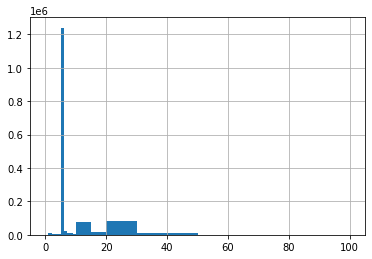

In [21]:
pos_gebot = gebot1820_pos['OFFERED_CAPACITY_[MW]']
pos_gebot.hist(bins=[0,1,2,3,4,5,6,7,8,9,10,15,20,30,50,100])
print(pos_gebot.median(), pos_gebot.mean())

In [69]:
gebot_date = gebot1820_pos[['date','OFFERED_CAPACITY_[MW]']].groupby(by='date').sum()
gebot_date['number']  = gebot1820_pos[['date','OFFERED_CAPACITY_[MW]']].groupby(by='date').count()
tender_date = tender1820_pos[['date', 'TOTAL_DEMAND_[MW]']]
tender_date = tender_date[tender_date['date'].isin(gebot_date.index)]
outlier = tender_date[tender_date['date'].duplicated(keep=False)]
outlier = outlier[outlier['TOTAL_DEMAND_[MW]'] > 50]
print(outlier)
tender_date = pd.concat([tender_date[tender_date['date'].duplicated(keep= False) == False], outlier])
print(gebot_date.size, tender_date.size)
print(tender_date[tender_date['date'].duplicated(keep= False)])
gebot_date['tender'] = tender_date.groupby(by='date').mean()
gebot_date.head()
print(gebot_date['tender'].median(), gebot_date['tender'].mean())

                    date  TOTAL_DEMAND_[MW]
313  2018-08-06 00:00:00               1883
314  2018-08-06 04:00:00               1883
316  2018-08-06 08:00:00               1883
318  2018-08-06 12:00:00               1883
321  2018-08-06 16:00:00               1883
322  2018-08-06 20:00:00               1883
1633 2019-05-16 00:00:00               1892
1634 2019-05-16 04:00:00               1892
1637 2019-05-16 08:00:00               1892
1638 2019-05-16 12:00:00               1892
1641 2019-05-16 16:00:00               1892
1642 2019-05-16 20:00:00               1892
9072 9072
Empty DataFrame
Columns: [date, TOTAL_DEMAND_[MW]]
Index: []
1892.0 2012.687610229277


<AxesSubplot:xlabel='date'>

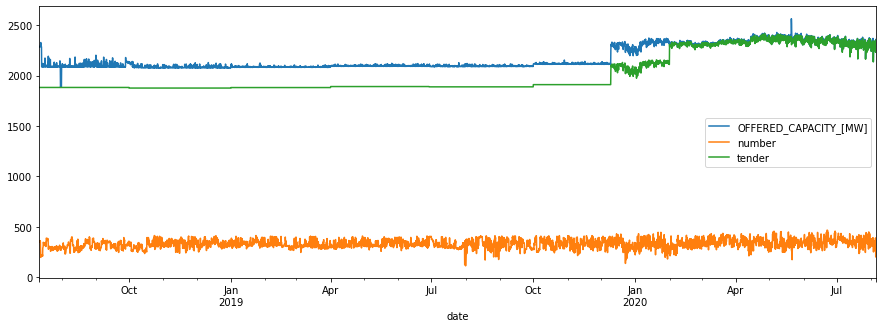

In [64]:
gebot_date.plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

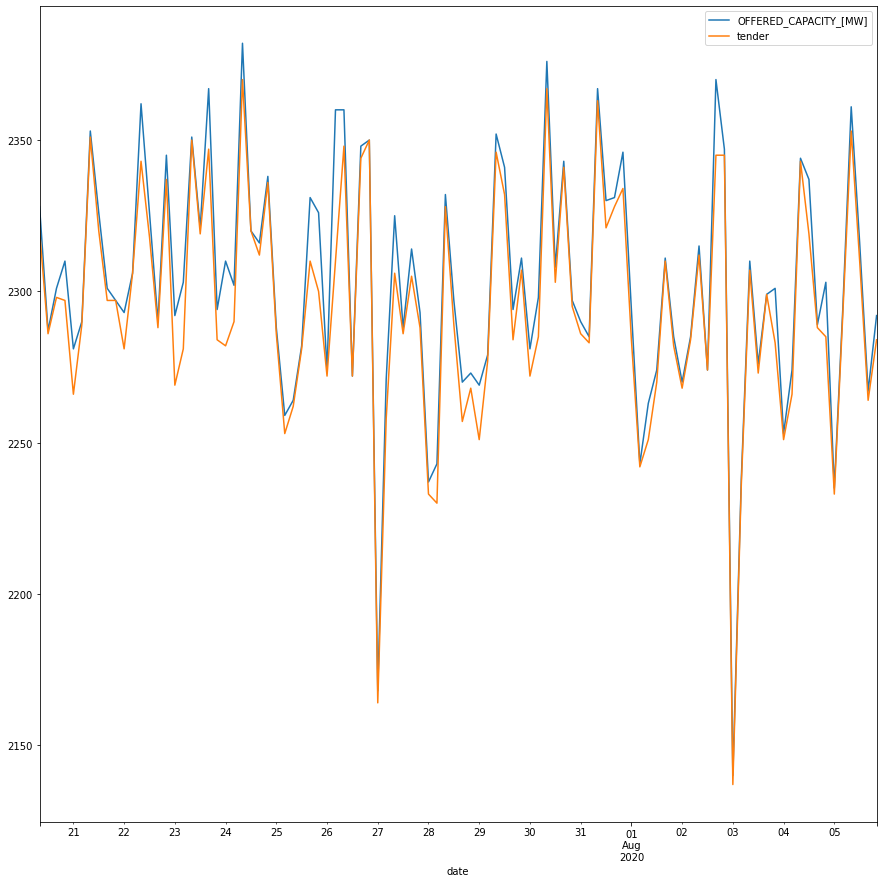

In [66]:
gebot_date[-100:][['OFFERED_CAPACITY_[MW]','tender']].plot(figsize=(15,15))

In [67]:
35*3*6*365

229950

In [68]:
1800*3*6*365

11826000

In [70]:
30000 * 20

600000